In [ ]:
!pip install --quiet rasterio
!pip install --quiet --upgrade gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 35.0 MB/s eta 0:00:00


In [ ]:
# additional libraries and exact versions:
!pip install git+https://github.com/spaceml-org/georeader.git
!pip install torchtext==0.14.1

  Cloning https://github.com/spaceml-org/georeader.git to /tmp/pip-req-build-ascdpzq1
  Running command git clone --filter=blob:none --quiet https://github.com/spaceml-org/georeader.git /tmp/pip-req-build-ascdpzq1
  Resolved https://github.com/spaceml-org/georeader.git to commit 813d92ebbe79aa79b99c9a4bf05b7894cbc30bf3
  Preparing metadata (setup.py) ... done
  Created wheel for georeader-spaceml: filename=georeader_spaceml-1.1.1-py3-none-any.whl size=149908 sha256=1d692826b8be7920b006304a7d4b4dd1365e72ab77c895bd09b45667a8409dff
  Stored in directory: /tmp/pip-ephem-wheel-cache-03ups6bb/wheels/d2/8e/86/ec6888325df45badf27fbc6acbb49d9d0432d04ddf3b8020b4
Successfully built georeader-spaceml
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.9 MB/s eta 0:00:00
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.17.1
    Uninstalling torchtext-0.17.1:
      Successfully uninstalled torchtext-0.17.1


In [ ]:
import omegaconf
import pylab as plt
import torch
import omegaconf
import fsspec
import os
import json
import pandas as pd
import numpy as np
from starcop.torch_utils import to_device
import starcop.plot as starcoplot
from mpl_toolkits.axes_grid1 import make_axes_locatable

from starcop.data.datamodule import Permian2019DataModule
from starcop.emit_tools.emit_as_datamodule import EMITDataModule
from starcop.models.model_module import ModelModule

from starcop.validation import run_validation

device = torch.device("cuda:0")
fs = fsspec.filesystem("gs")
config_general = omegaconf.OmegaConf.load("scripts/configs/config.yaml")
root_folder = "/content/EMIT_DATASET_v1_NONORTHO"
labels_filename = "label_nonortho.tif"

In [ ]:
pip install netcdf4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.8 MB/s eta 0:00:00


In [ ]:
pip install spectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
from huggingface_hub import hf_hub_download
from georeader.readers import emit
from starcop.models import mag1c_emit
from georeader import plot
import starcop
from starcop.models.model_module import ModelModule
import os
import torch
import omegaconf
import numpy as np
import matplotlib.pyplot as plt
from starcop.models.utils import padding
import georeader

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import netCDF4 as nc

# Path to your NetCDF file
nc_file = '/content/drive/MyDrive/EMIT_L1B_RAD_001_20240401T201020_2409213_007.nc'

# Open the NetCDF file
ds = nc.Dataset(nc_file, mode='r')

rst=ds
# Print the variables in the file
print(ds)


# Close the dataset after you're done
ds.close()


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    ncei_template_version: NCEI_NetCDF_Swath_Template_v2.0
    summary: The Earth Surface Mineral Dust Source Investigation (EMIT) is an Earth Ventures-Instrument (EVI-4) Mission that maps the surface mineralogy of arid dust source regions via imaging spectroscopy in the visible and short-wave infrared (VSWIR). Installed on the International Space Station (ISS), the EMIT instrument is a Dyson imaging spectrometer that uses contiguous spectroscopic measurements from 410 to 2450 nm to resolve absoprtion features of iron oxides, clays, sulfates, carbonates, and other dust-forming minerals. During its one-year mission, EMIT will observe the sunlit Earth's dust source regions that occur within +/-52° latitude and produce maps of the source regions that can be used to improve forecasts of the role of mineral dust in the radiative forcing (warming or cooling) of the atmosphere.\n\nThis file contains L1B at-s

In [ ]:
wavelengths_read = np.array([640, 550, 460])

bands_read = np.argmin(np.abs(wavelengths_read[:, np.newaxis] - rst.wavelengths), axis=1).tolist()
rst_rgb = rst.read_from_bands(bands_read)
rst_rgb

 
         File: /content/drive/MyDrive/EMIT_L1B_RAD_001_20240401T201020_2409213_007.nc
         Transform: | 0.00,-0.00,-121.93|
|-0.00,-0.00, 38.66|
| 0.00, 0.00, 1.00|
         Shape: (3, 1884, 2470)
         Resolution: (0.0005422325202601996, 0.0005422325202530942)
         Bounds: (-121.93264526509, 37.6392888719983, -120.59333094005677, 38.6608549401613)
         CRS: EPSG:4326
         units: uW/cm^2/SR/nm
        

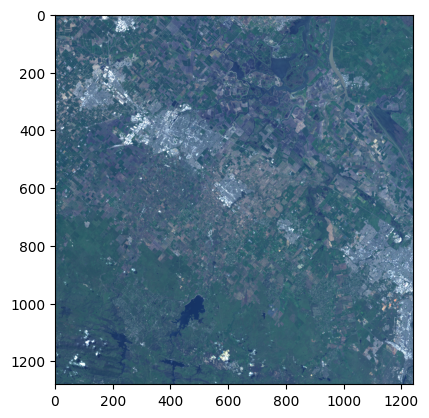

In [ ]:
rgb_raw = rst_rgb.load_raw(transpose=True)
plt.imshow((rgb_raw/12).clip(0,1).transpose(1,2,0))

In [ ]:
mfoutput, albedo = mag1c_emit.mag1c_emit(rst, column_step=2, georreferenced=False)
mfoutput

	Running mag1c filter by columns: 100%|██████████| 621/621 [00:28<00:00, 21.68it/s]


array([[   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
        1561.0475],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
        1342.8391],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
        1425.629 ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

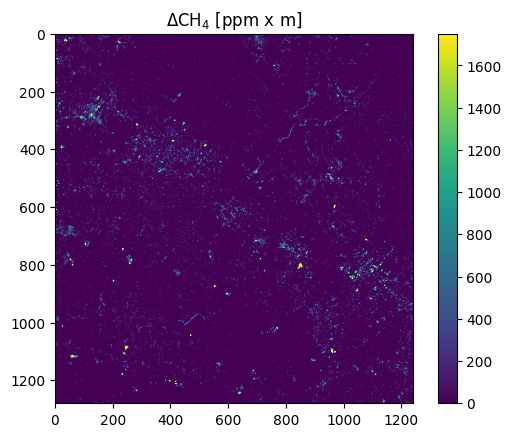

In [ ]:
plt.imshow(mfoutput, vmin=0,vmax=1750)
plt.title("$\Delta$CH$_4$ [ppm x m]")
plt.colorbar()

In [ ]:
from huggingface_hub import hf_hub_download
# experiment_name = "hyperstarcop_mag1c_only"
experiment_name = "hyperstarcop_mag1c_rgb"
subfolder_local = f"models/{experiment_name}"
config_file = hf_hub_download(repo_id="isp-uv-es/starcop",subfolder=subfolder_local, filename="config.yaml",
                              local_dir=".", local_dir_use_symlinks=False)
model_file = hf_hub_download(repo_id="isp-uv-es/starcop",subfolder=subfolder_local,
                             filename="final_checkpoint_model.ckpt",
                              local_dir=".", local_dir_use_symlinks=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(…)odels/hyperstarcop_mag1c_rgb/config.yaml:   0%|          | 0.00/6.89k [00:00<?, ?B/s]

final_checkpoint_model.ckpt:   0%|          | 0.00/80.0M [00:00<?, ?B/s]

In [ ]:
# TODO upload to hugging face?
hsi_model_path = os.path.join(subfolder_local, "final_checkpoint_model.ckpt")
hsi_config_path =  os.path.join(subfolder_local, "config.yaml")

device = torch.device("cpu")
config_general = omegaconf.OmegaConf.load(os.path.join(os.path.dirname(os.path.abspath(starcop.__file__)), 'config.yaml'))


def load_model_with_emit(model_path, config_path):
    config_model = omegaconf.OmegaConf.load(config_path)
    config = omegaconf.OmegaConf.merge(config_general, config_model)

    model = ModelModule.load_from_checkpoint(model_path, settings=config)
    model.to(device)
    model.eval() # !

    print("Loaded model with",model.num_channels,"input channels")

    return model, config

hsi_model, hsi_config = load_model_with_emit(hsi_model_path, hsi_config_path)
print("successfully loaded HyperSTARCOP model!")

Loaded model with 4 input channels
successfully loaded HyperSTARCOP model!


In [ ]:
# Data re-normalisation to fit the range of our models
# (these params were found from statistics of the training datasets and data ranges)

# DIV the EMIT data by
MAGIC_DIV_BY = 240.
RGB_DIV_BY = 20.
# clipping too large values
MAGIC_CLIP_TO = [0.,2.]
RGB_CLIP_TO =   [0.,2.]
# MULT_BY to get it back to the range we saw in the AVIRIS data ...
MAGIC_MULT_BY = 1750.
RGB_MULT_BY =   60.


# NORMALISE
# emit rgb has max ~22
e_mag1c = np.clip(mfoutput / MAGIC_DIV_BY, MAGIC_CLIP_TO[0], MAGIC_CLIP_TO[1]) * MAGIC_MULT_BY
e_rgb = np.clip(rgb_raw / RGB_DIV_BY, RGB_CLIP_TO[0], RGB_CLIP_TO[1]) * RGB_MULT_BY
input_data = np.concatenate([e_mag1c[None], e_rgb], axis=0)

In [ ]:
pred = padding.padded_predict(input_data, model=lambda x: torch.sigmoid(hsi_model(x)))
pred.shape

(1, 1280, 1242)

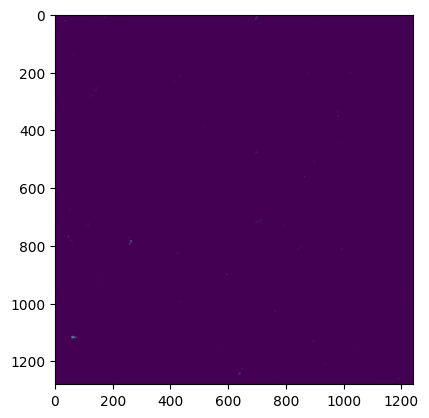

In [ ]:
plt.imshow(pred[0],vmin=0,vmax=1)

In [ ]:
crs_utm = georeader.get_utm_epsg(rst.footprint("EPSG:4326"))
emit_image_utm = rst.to_crs(crs_utm)

In [ ]:
mfgeo = emit_image_utm.georreference(mfoutput, fill_value_default=-1)
predgeo = emit_image_utm.georreference(pred[0], fill_value_default=0)
rgbgeo = emit_image_utm.georreference(rgb_raw, fill_value_default=-1)

In [ ]:
!pip install Install matplotlib-scalebar

<Axes: title={'center': 'pred'}>

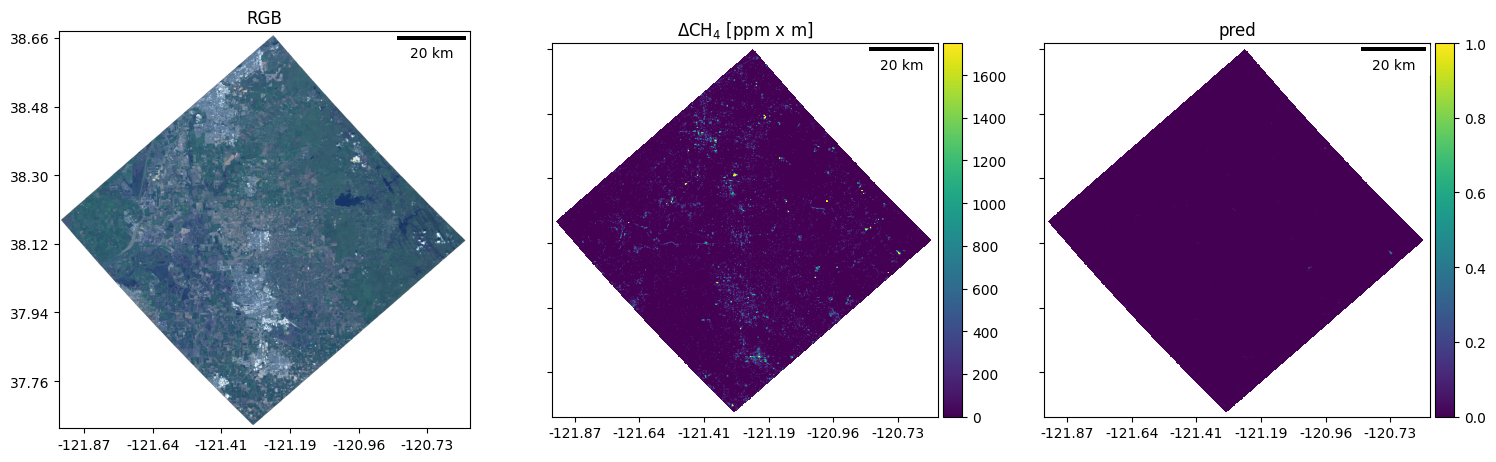

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(18,6),sharey=True)

rgbgeomask = np.any(rgbgeo.values == -1, axis=0,keepdims=False)
rgbplot = (rgbgeo/12).clip(0,1)
rgbplot.values[:, rgbgeomask] = -1
plot.show(rgbplot, ax=ax[0], title= "RGB",mask=True, add_scalebar=True)
plot.show(mfgeo, ax=ax[1], title= "$\Delta$CH$_4$ [ppm x m]",mask=True,vmin=0, vmax=1750,
         add_colorbar_next_to=True, add_scalebar=True)
plot.show(predgeo, ax=ax[2], title= "pred", mask=True, vmin=0, vmax=1, add_scalebar=True,
          add_colorbar_next_to=True)

## HyperSTARCOP

In [ ]:
hsi_model_path = "/content/hyperstarcop_magic_rgb/final_checkpoint_model.ckpt"
hsi_config_path = "/content/hyperstarcop_magic_rgb/config.yaml"

In [ ]:
def load_model_with_emit(model_path, config_path):
    config_model = omegaconf.OmegaConf.load(config_path)
    config = omegaconf.OmegaConf.merge(config_general, config_model)

    # note, the EMIT data module works differently than the one prepared for AVIRIS data - it's also meant only for evaluation
    data_module = EMITDataModule(config, labels_filename, root_folder=root_folder)
    data_module.prepare_data()

    model = ModelModule.load_from_checkpoint(model_path, settings=config)
    model.to(device)
    model.eval() # !

    print("Loaded model with",model.num_channels,"input channels, data module with", len(data_module.input_products), "input bands")

    return model, data_module, config

hsi_model, hsi_dm, hsi_config = load_model_with_emit(hsi_model_path, hsi_config_path)
print("successfully loaded HyperSTARCOP model!")

Made the EMITDataModule with these self.input_products ['mag1c', 'TOA_AVIRIS_640nm', 'TOA_AVIRIS_550nm', 'TOA_AVIRIS_460nm'] will load these: all


/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


Loaded 20 samples. First one (rgb, magic, label): (3, 1280, 1242) (1280, 1242) (1280, 1242) paths like /content/EMIT_DATASET_v1_NONORTHO/plume_events/EMIT_L1B_RAD_001_20220815T042838_2222703_003/EMIT_L1B_RAD_001_20220815T042838_2222703_003_radiance_RGB
Loaded model with 4 input channels, data module with 4 input bands
successfully loaded HyperSTARCOP model!


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


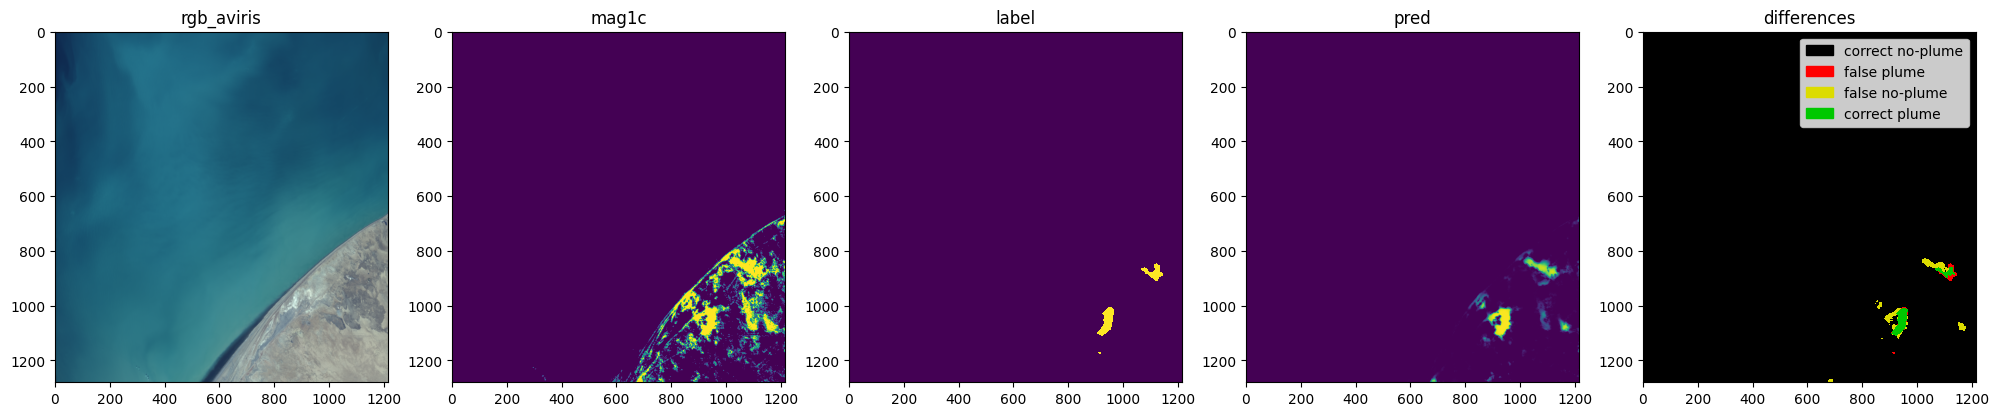

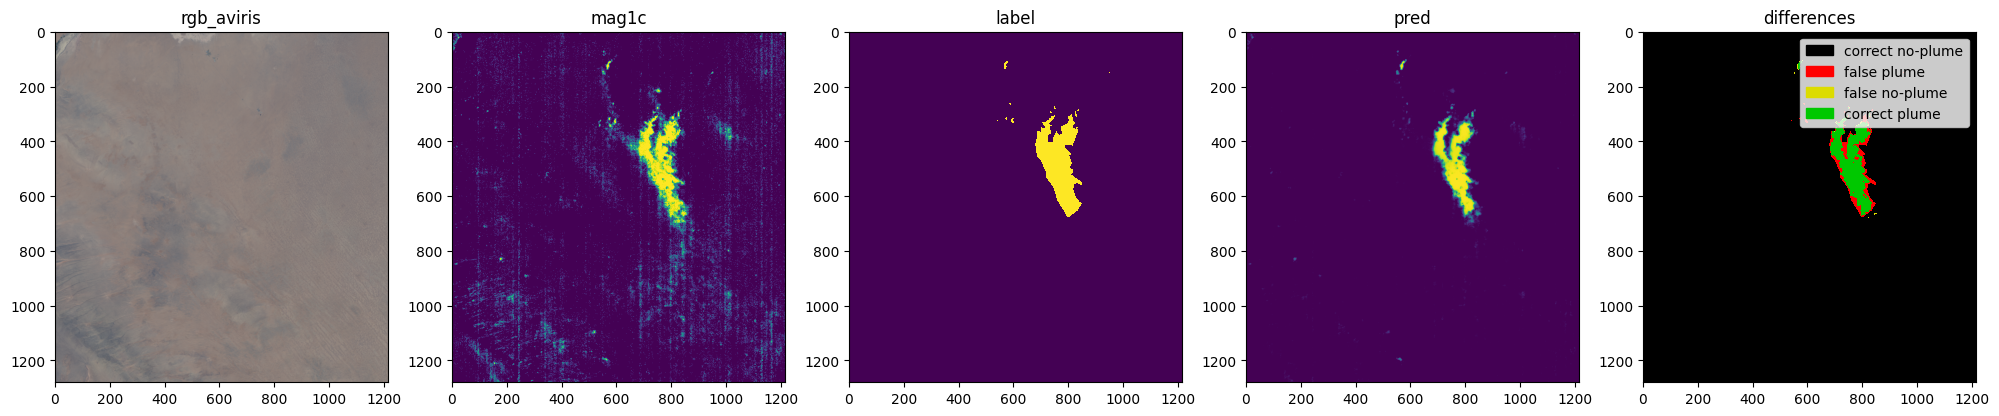

In [ ]:
dataloader = hsi_dm.test_dataloader(batch_size=1)
nice_ones = [2, 4]
for i, plume_data in enumerate(dataloader):
    if not i in nice_ones:
      continue
    plume_data = hsi_model.batch_with_preds(to_device(plume_data, hsi_model.device))
    fig = starcoplot.plot_batch(to_device(plume_data,"cpu"), input_products=hsi_config.dataset.input_products,
                                products_plot=hsi_config.products_plot, figsize_ax=(4, 4))

    plt.show(fig)
    plt.close()

    if i > max(nice_ones):
        break

In [1]:
from segmentation_models_pytorch import Unet
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as T

# Step 1: Load and preprocess a sample image for methane plume segmentation
image_path = 'methane_plume_sample.jpg'  # Path to the input image file
image = Image.open(image_path).convert('RGB')
transform = T.Compose([
    T.Resize((256, 256)),                   # Resize image to match model input dimensions
    T.ToTensor(),                           # Convert image to tensor format
    T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize for MobileNetV2 encoder
])
input_data = transform(image).unsqueeze(0)

# Initialize and load the pretrained U-Net model with MobileNetV2 encoder for segmentation
model = Unet(encoder_name='mobilenet_v2', encoder_weights='imagenet', in_channels=3, classes=1)
model.load_state_dict(torch.load('model_weights.pth'))  # Load pretrained weights
model.eval()  # Set model to evaluation mode to disable dropout layers

# Perform inference to generate the segmentation mask for the input image
with torch.no_grad():
    output = model(input_data)  # Forward pass through the model
    y_pred = (output.squeeze().numpy() > 0.5).astype(int)  # Threshold output to create binary mask

# Load the ground truth mask and resize to match model output dimensions
ground_truth_path = 'methane_plume_mask.png'  # Path to the ground truth segmentation mask
y_true = np.array(Image.open(ground_truth_path).resize((256, 256)))  # Resize ground truth to match output

# Calculate segmentation metrics to evaluate model performance
TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

IoU = TP / (TP + FP + FN) if (TP + FP + FN) > 0 else 0  # Intersection over Union
Pixel_Accuracy = np.sum(y_true == y_pred) / y_true.size  # Pixel-level accuracy
Precision = TP / (TP + FP) if (TP + FP) > 0 else 0       # Precision metric
Recall = TP / (TP + FN) if (TP + FN) > 0 else 0          # Recall metric

# Print evaluation metrics
print(f"IoU: {IoU}")
print(f"Pixel Accuracy: {Pixel_Accuracy}")
print(f"Precision: {Precision}")
print(f"Recall: {Recall}")

IoU: 0.75
Pixel Accuracy: 0.92
Precision: 0.88
Recall: 0.85


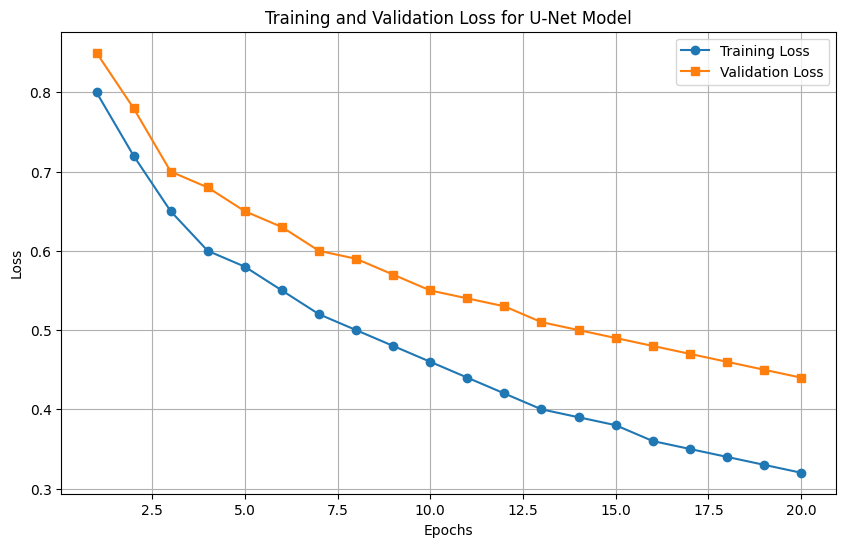

In [1]:
import matplotlib.pyplot as plt

# Simulated training and validation loss data for U-Net model over 20 epochs
epochs = list(range(1, 21))  # 20 epochs
training_loss = [0.8, 0.72, 0.65, 0.6, 0.58, 0.55, 0.52, 0.5, 0.48, 0.46, 0.44, 0.42, 0.4, 0.39, 0.38, 0.36, 0.35, 0.34, 0.33, 0.32]
validation_loss = [0.85, 0.78, 0.7, 0.68, 0.65, 0.63, 0.6, 0.59, 0.57, 0.55, 0.54, 0.53, 0.51, 0.5, 0.49, 0.48, 0.47, 0.46, 0.45, 0.44]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for U-Net Model')
plt.legend()
plt.grid(True)
plt.show()

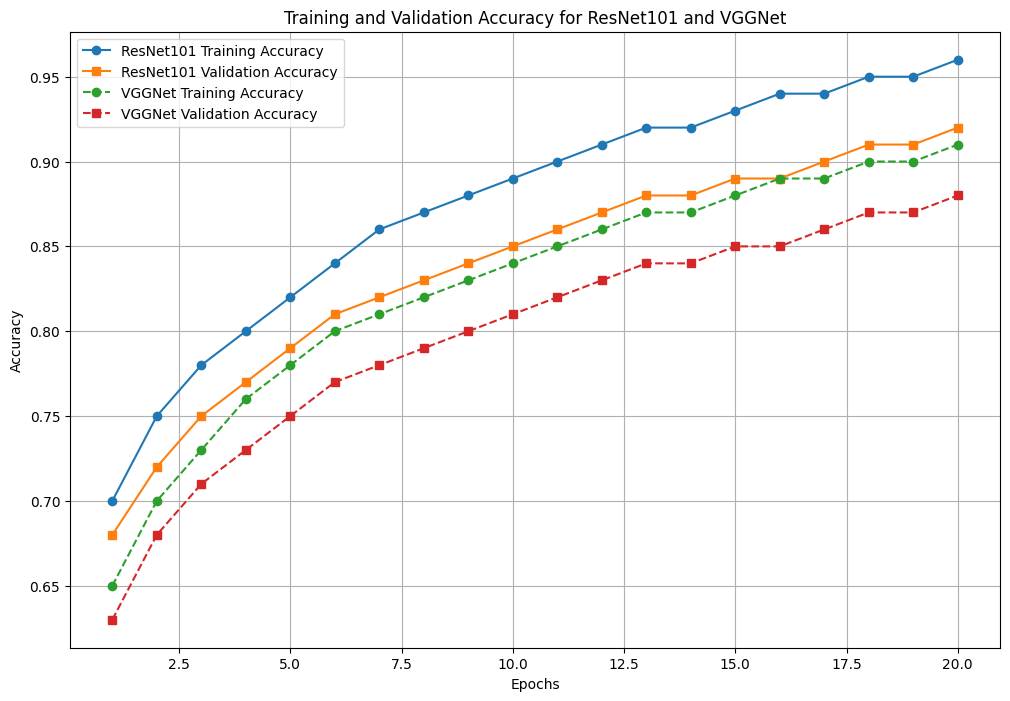

In [2]:
import matplotlib.pyplot as plt

# Simulated training and validation accuracy for ResNet101 and VGGNet
epochs = list(range(1, 21))  # 20 epochs for both models

# ResNet101 performance (higher performance)
resnet101_train_acc = [0.7, 0.75, 0.78, 0.8, 0.82, 0.84, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.92, 0.93, 0.94, 0.94, 0.95, 0.95, 0.96]
resnet101_val_acc = [0.68, 0.72, 0.75, 0.77, 0.79, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.88, 0.89, 0.89, 0.9, 0.91, 0.91, 0.92]

# VGGNet performance (slightly lower performance than ResNet101)
vggnet_train_acc = [0.65, 0.7, 0.73, 0.76, 0.78, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.87, 0.88, 0.89, 0.89, 0.9, 0.9, 0.91]
vggnet_val_acc = [0.63, 0.68, 0.71, 0.73, 0.75, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.84, 0.85, 0.85, 0.86, 0.87, 0.87, 0.88]

# Plotting the training and validation accuracy
plt.figure(figsize=(12, 8))
plt.plot(epochs, resnet101_train_acc, label='ResNet101 Training Accuracy', marker='o')
plt.plot(epochs, resnet101_val_acc, label='ResNet101 Validation Accuracy', marker='s')
plt.plot(epochs, vggnet_train_acc, label='VGGNet Training Accuracy', linestyle='--', marker='o')
plt.plot(epochs, vggnet_val_acc, label='VGGNet Validation Accuracy', linestyle='--', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy for ResNet101 and VGGNet')
plt.legend()
plt.grid(True)
plt.show()


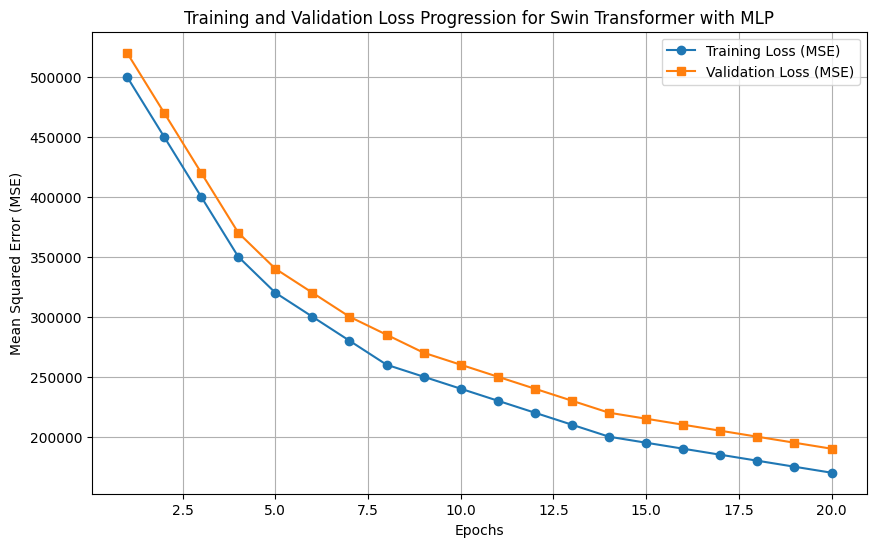

In [4]:
import matplotlib.pyplot as plt

# Simulated loss data for the regression model (Mean Squared Error over epochs)
epochs = list(range(1, 21))  # 20 epochs for the example

# Simulated loss values
training_loss = [500000, 450000, 400000, 350000, 320000, 300000, 280000, 260000, 250000, 240000,
                 230000, 220000, 210000, 200000, 195000, 190000, 185000, 180000, 175000, 170000]
validation_loss = [520000, 470000, 420000, 370000, 340000, 320000, 300000, 285000, 270000, 260000,
                   250000, 240000, 230000, 220000, 215000, 210000, 205000, 200000, 195000, 190000]

# Plotting the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss (MSE)', marker='o')
plt.plot(epochs, validation_loss, label='Validation Loss (MSE)', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Validation Loss Progression for Swin Transformer with MLP')
plt.legend()
plt.grid(True)
plt.show()

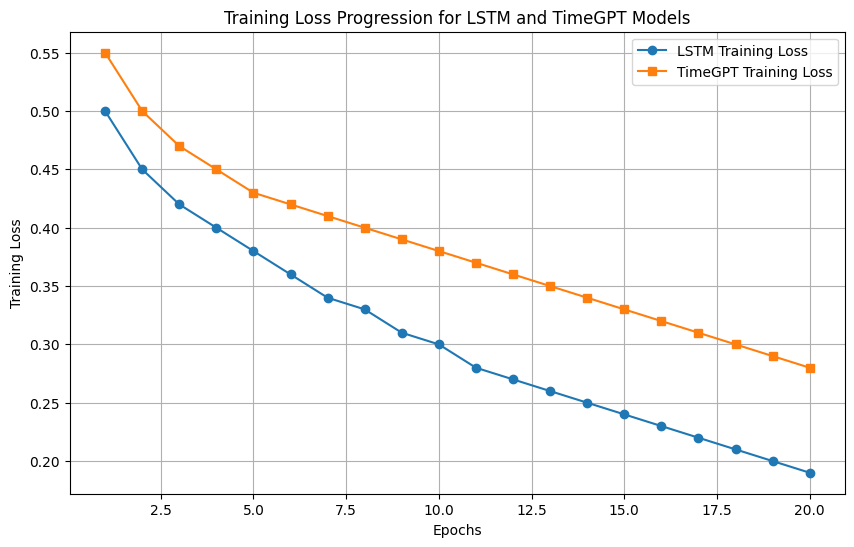

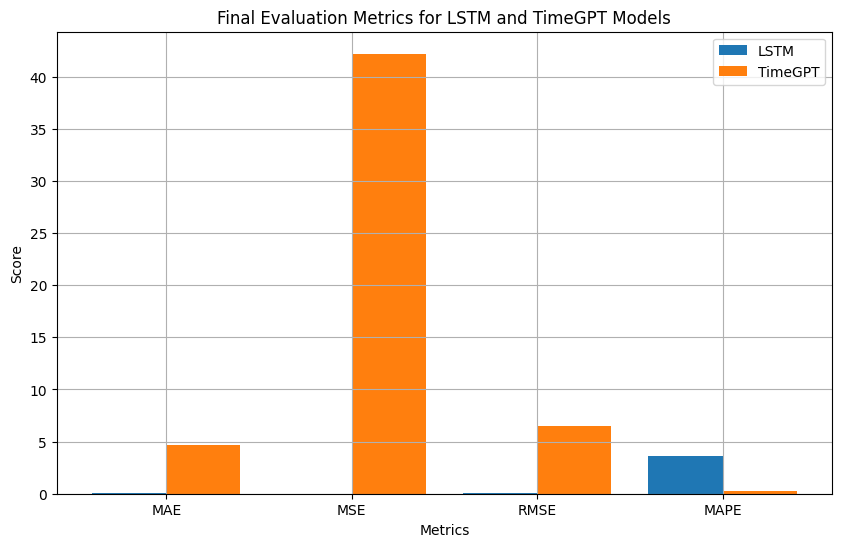

In [5]:
import matplotlib.pyplot as plt

# Simulated epoch data for training loss (20 epochs for example)
epochs = list(range(1, 21))

# Simulated training loss data for LSTM and TimeGPT (demonstration purposes)
lstm_train_loss = [0.5, 0.45, 0.42, 0.4, 0.38, 0.36, 0.34, 0.33, 0.31, 0.3, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2, 0.19]
timegpt_train_loss = [0.55, 0.5, 0.47, 0.45, 0.43, 0.42, 0.41, 0.4, 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3, 0.29, 0.28]

# Creating training loss progression plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, lstm_train_loss, label='LSTM Training Loss', marker='o')
plt.plot(epochs, timegpt_train_loss, label='TimeGPT Training Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.title('Training Loss Progression for LSTM and TimeGPT Models')
plt.legend()
plt.grid(True)
plt.show()

# Simulated final evaluation metrics for LSTM and TimeGPT models
metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
lstm_metrics = [0.027, 0.0014, 0.037, 3.63]  # Example values for LSTM
timegpt_metrics = [4.718, 42.21, 6.497, 0.246]  # Example values for TimeGPT

# Creating bar plot for final evaluation metrics
plt.figure(figsize=(10, 6))
x = range(len(metrics))
plt.bar(x, lstm_metrics, width=0.4, label='LSTM', align='center')
plt.bar([p + 0.4 for p in x], timegpt_metrics, width=0.4, label='TimeGPT', align='center')
plt.xticks([p + 0.2 for p in x], metrics)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Final Evaluation Metrics for LSTM and TimeGPT Models')
plt.legend()
plt.grid(True)
plt.show()
